In [1]:
import numpy as np
from szegedy import SzegedyRandomWalk
import matplotlib.pyplot as plt

## Experimental

In [28]:
def probability_graph(N, resetting_rate):
    # crete the matrix
    matrix = np.zeros((N, N))
    # add loop for starting point
    matrix[0][0] = 1
    
    # add resetting edges and loops
    for j in range(1, N):
        matrix[j][0] = resetting_rate
        matrix[j][j] = 1 - matrix[j][0]
        
    szegedy = SzegedyRandomWalk(matrix)
    
    # starting position
    initial_state = np.ones(N) / np.sqrt(N - 1)
    initial_state[0] = 0
    initial_state_H = np.kron(initial_state, initial_state) 
    print(szegedy.operator)
    
    # perform walk
    probabilities = []
    state = initial_state_H
    for i in range(100):
        state = szegedy.operator @ state
        probabilities.append(np.power(state, 2).reshape((N, N)).sum(axis=1)[0])
        
    return probabilities

[[ 1.    0.    0.    0.  ]
 [ 0.    0.6   0.64  0.48]
 [ 0.    0.    0.6  -0.8 ]
 [ 0.   -0.8   0.48  0.36]]


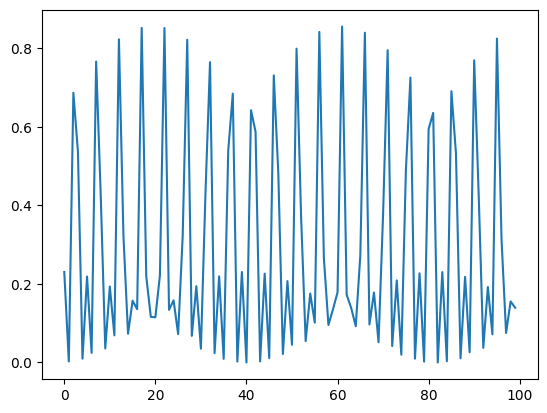

In [29]:
plt.plot([i for i in range(100)], probability_graph(2, 0.2))
plt.show()

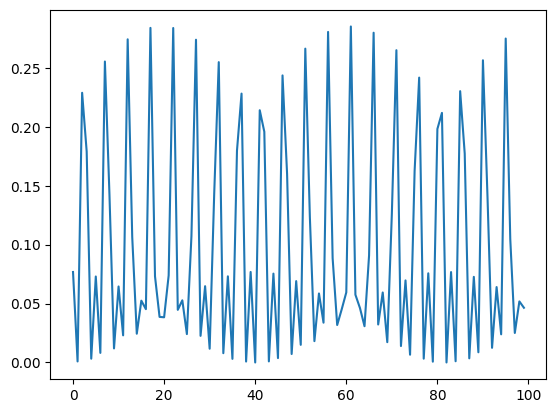

In [4]:
plt.plot([i for i in range(100)], probability_graph(4, 0.2))
plt.show()

## Manual calculation

In [5]:
p=0.2

In [48]:
a=1-2*p
b=p-p**2
c=2 * (p-p**2)**0.5

In [49]:
c

0.8

In [50]:
def next_vector(current):
    return [0, a * current[1] + 4 * b * current[2]+c * a *current[3], a *current[2]-c*current[3], -c*current[1] + c*a*current[2] + a**2*current[3]]

In [53]:
def manual_vector_of_probabilities(n = 100):
    current_v = [0, c*a, -c, a**2]
    probabilities = [b*a]
    for i in range(2, n+1):
        current_v = next_vector(current_v)
        probabilities.append(current_v[1]**2)
    return probabilities

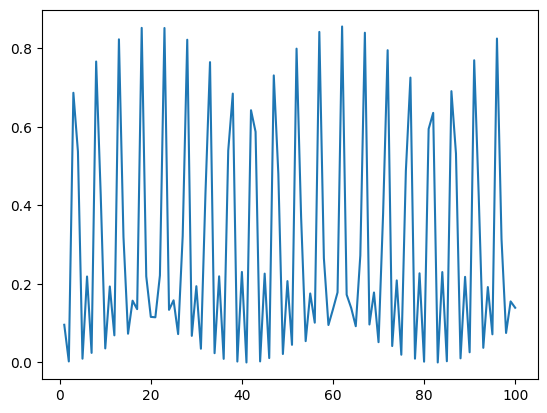

In [54]:
plt.plot([i for i in range(1, 101)], manual_vector_of_probabilities())
plt.show()